In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
data = pd.read_csv("figure4.csv")
# data = pd.read_csv("figure8.csv")

In [3]:
data

,Subset_Ratio,Model,pearson_rna,pearson_adt
0,10%,MINERVA,0.664,0.761
1,10%,MIDAS,0.608,0.743
2,10%,scVAEIT,0.108,0.213
3,10%,totalVI,0.417,0.277
4,10%,Multigrate,0.092,0.316
5,10%,StabMap,0.058,0.032
6,20%,MINERVA,0.803,0.700
7,20%,MIDAS,0.536,0.701
8,20%,scVAEIT,0.126,0.181
9,20%,totalVI,0.257,0.271


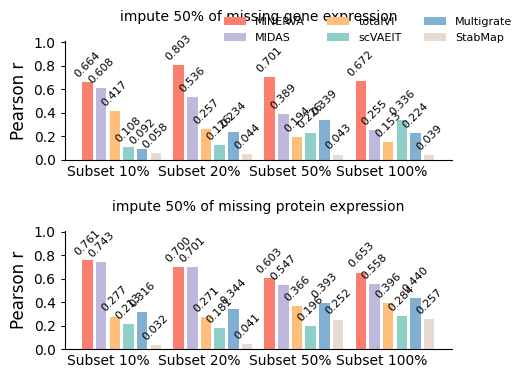

In [4]:
labels = ['Subset 10%', 'Subset 20%', 'Subset 50%', 'Subset 100%']

# x = np.arange(len(labels))  # the label locations
x = np.array([0, 0.6, 1.2, 1.8])
width = 0.07  # the width of the bars

fig, axes = plt.subplots(2, 1, figsize=(5, 4))
plt.subplots_adjust(hspace = 0.6)
for i in [0, 1]:
    if i == 0:
        col = "pearson_rna"
    else:
        col = "pearson_adt"
    rects0 = axes[i].bar(x - width/2, data[(data['Model'] == "MINERVA")][col], width, label = 'MINERVA', color = '#FA7F6F')
    rects1 = axes[i].bar(x + width/2 + 0.02, data[(data['Model'] == "MIDAS")][col], width, label = 'MIDAS', color = '#BEB8DC')
    rects2 = axes[i].bar(x + width*3/2 + 0.04, data[(data['Model'] == "totalVI")][col], width, label = 'totalVI', color = '#FFBE7A')
    rects3 = axes[i].bar(x + width*5/2 + 0.06, data[(data['Model'] == "scVAEIT")][col], width, label = 'scVAEIT', color = '#8ECFC9')
    rects4 = axes[i].bar(x + width*7/2 + 0.08, data[(data['Model'] == "Multigrate")][col], width, label = 'Multigrate', color = '#82B0D2')
    rects5 = axes[i].bar(x + width*9/2 + 0.10, data[(data['Model'] == "StabMap")][col], width, label = 'StabMap', color = '#E7DAD2')

    axes[i].bar_label(rects0, padding = 2, fmt='%.3f', fontsize = 8, rotation = 45)
    axes[i].bar_label(rects1, padding = 2, fmt='%.3f', fontsize = 8, rotation = 45)
    axes[i].bar_label(rects2, padding = 2, fmt='%.3f', fontsize = 8, rotation = 45)
    axes[i].bar_label(rects3, padding = 2, fmt='%.3f', fontsize = 8, rotation = 45)
    axes[i].bar_label(rects4, padding = 2, fmt='%.3f', fontsize = 8, rotation = 45)
    axes[i].bar_label(rects5, padding = 2, fmt='%.3f', fontsize = 8, rotation = 45)

    axes[i].tick_params(axis='x', direction = 'in', bottom = False)
    axes[i].tick_params(axis='y', direction = 'out', labelsize = 10, length = 3)
    axes[i].set_xticks(x + 0.1)
    axes[i].set_xticklabels(labels, size = 10)
    axes[i].set_ylim(bottom = 0., top = 1.01)
    axes[i].set_yticks(np.arange(0., 1.01, step = 0.2))
    axes[i].set_ylabel("Pearson r", fontsize = 12)
    if i == 0:
        axes[i].set_title("impute 50% of missing gene expression", fontsize = 10, y = 1.1)
        axes[i].legend(loc = (0.4, 0.95), ncol = 3, fontsize = 8, frameon = False)
    else:
        axes[i].set_title("impute 50% of missing protein expression", fontsize = 10, y = 1.1)
        

    for spine in ['top', 'right']:
        axes[i].spines[spine].set_color('none')


plt.savefig('figure8.svg',dpi = 300, bbox_inches = 'tight')
plt.show()
